In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.metrics
%matplotlib inline

In [8]:
balance = pd.read_csv('balance.txt', index_col=0)
balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
balance['Married'] = balance['Married'].map({'Yes': 1, 'No': 0})
balance['Gender'] = balance['Gender'].map({'Female': 0, ' Male': 1})
balance['Student'] = balance['Student'].map({'Yes': 1, 'No': 0})
balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,0,1,1,Asian,903
3,104.593,7075,514,4,71,11,1,0,0,Asian,580
4,148.924,9504,681,3,36,11,0,0,0,Asian,964
5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


In [10]:
ethnicity_dummy = pd.get_dummies(balance['Ethnicity'])
balance[ ['Asian', 'Caucasian'] ] = ethnicity_dummy[ ['Asian', 'Caucasian'] ]
del balance['Ethnicity']
balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0
3,104.593,7075,514,4,71,11,1,0,0,580,1,0
4,148.924,9504,681,3,36,11,0,0,0,964,1,0
5,55.882,4897,357,2,68,16,1,0,1,331,0,1


In [19]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

def plot_model(X, y, model, label='Residual Plot'):
    X = sm.add_constant(X)
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()

In [20]:
X = balance.copy()
y = X.pop('Balance')

In [21]:
model = summary_model(X, y)
model.summary()

/home/chyld/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          1.11e-253
Time:                        13:10:10   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.8611     35.801    -13.683      0.000    -560.250    -419.473
Income        -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit          0.1909      0.033      5.824      0.000       0.126       0.255
Rating         1.1365      0.491      2.315      0.021       0.171       2.102
Cards         17.7245      4.341      4.083      0.000       9.190      26.259
Age           -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education     -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender        10.6532      9.914      1.075      0.283      -8.839      30.145
Student      425.7474     16.723     25.459      0.000     392.869     458.626
Married       -8.5339     10.363     -0.824      0.411     -28.908      11.841
Asian         16.8042     14.119      1.190      0.235     -10.955      44.564
Caucasian     10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

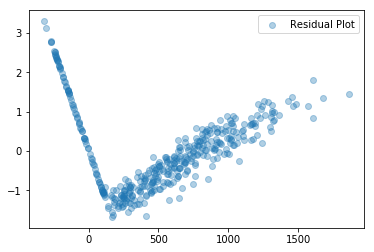

In [22]:
plot_model(X, y, model)

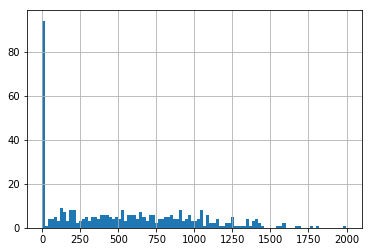

In [25]:
y.hist(bins=100);

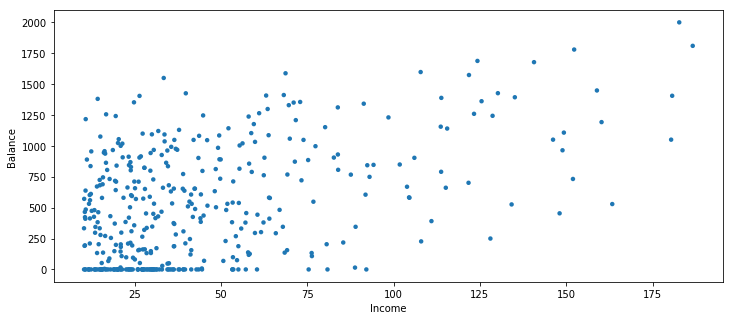

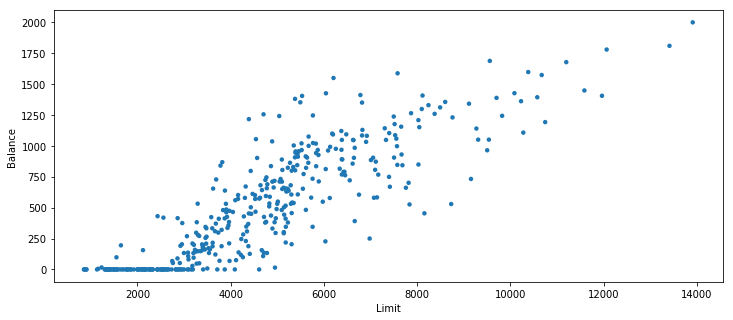

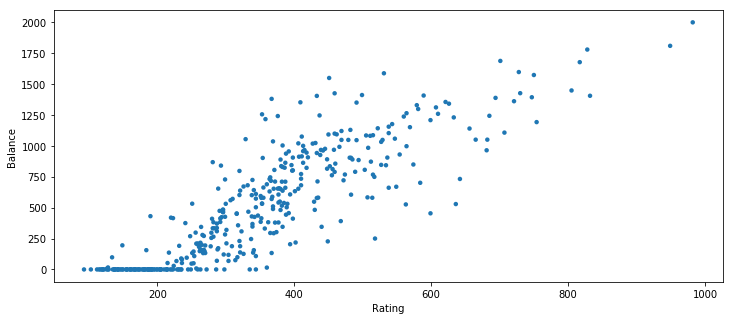

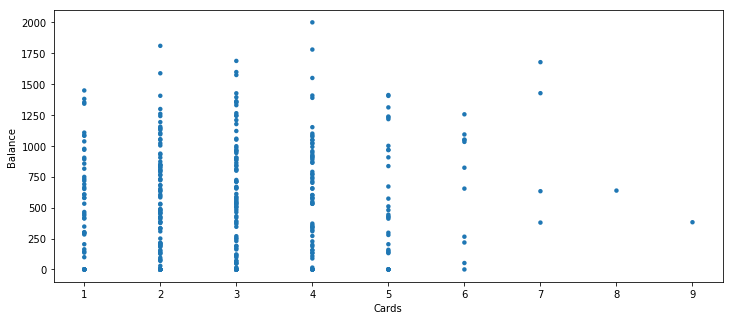

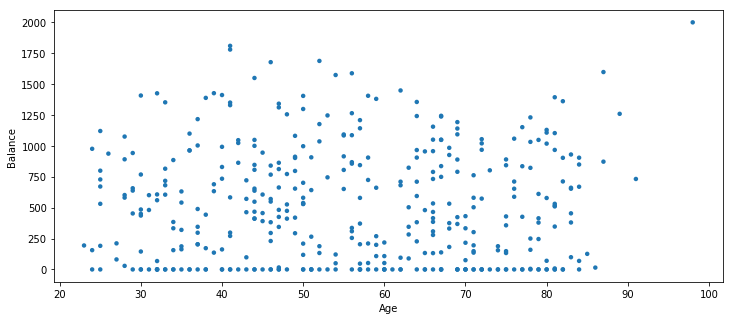

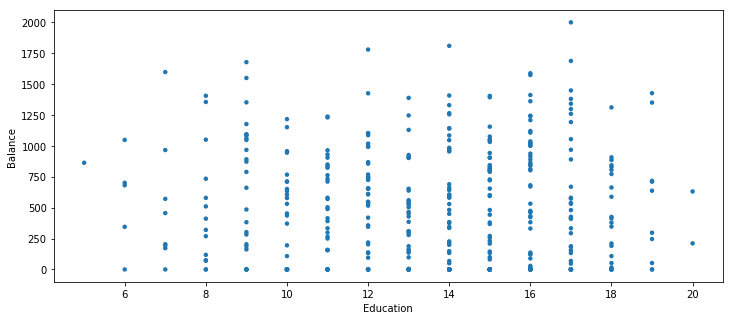

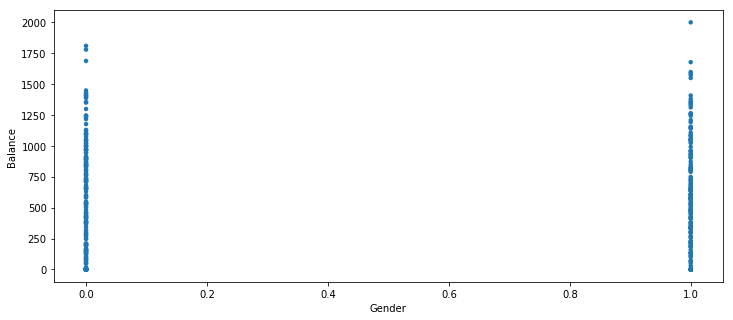

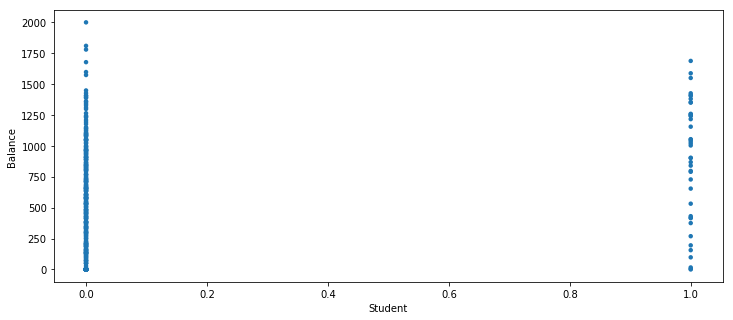

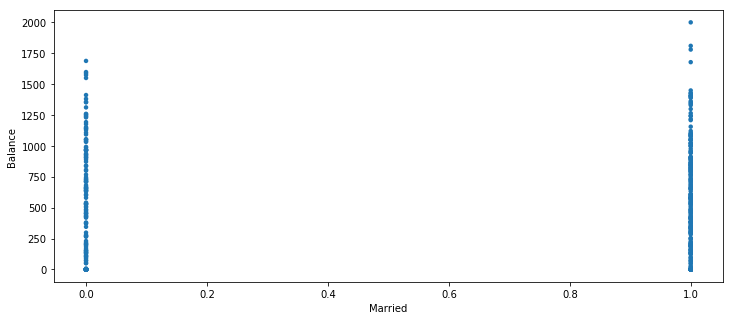

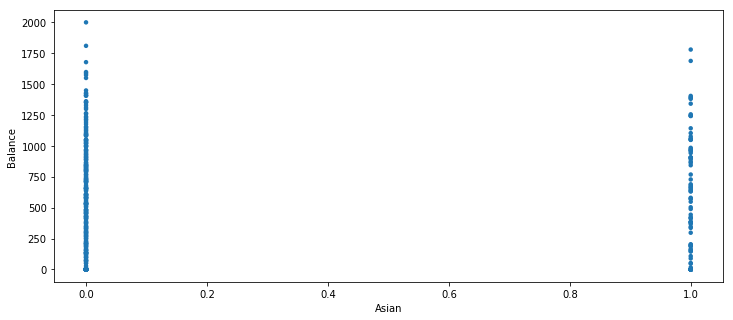

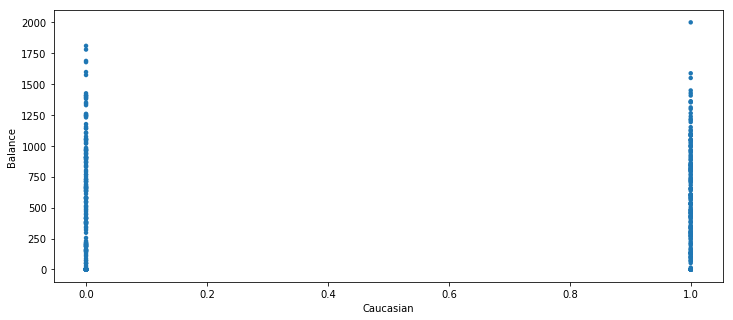

In [26]:
for col in X.columns:
    balance.plot(kind='scatter', y='Balance', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('Balance')
    plt.show()

In [30]:
bal2 = balance[(balance['Limit'] >= 3000) & (balance['Rating'] >= 250)]
bal2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0
3,104.593,7075,514,4,71,11,1,0,0,580,1,0
4,148.924,9504,681,3,36,11,0,0,0,964,1,0
5,55.882,4897,357,2,68,16,1,0,1,331,0,1


In [32]:
X = bal2.copy()
y = X.pop('Balance')

In [33]:
model = summary_model(X, y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8322.
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:19:48   Log-Likelihood:                -1347.0
No. Observations:                 296   AIC:                             2718.
Df Residuals:                     284   BIC:                             2762.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -676.6803     10.242    -66.072      0.000    -696.839    -656.521
Income        -9.6817      0.064   -151.266      0.000      -9.808      -9.556
Limit          0.3135      0.009     35.112      0.000       0.296       0.331
Rating         0.0933      0.133      0.702      0.483      -0.168       0.355
Cards         24.9930      1.130     22.118      0.000      22.769      27.217
Age           -1.0316      0.081    -12.738      0.000      -1.191      -0.872
Education     -0.2281      0.433     -0.527      0.599      -1.081       0.625
Gender        -0.3803      2.731     -0.139      0.889      -5.755       4.995
Student      497.1057      4.674    106.351      0.000     487.905     506.306
Married       -2.9263      2.885     -1.014      0.311      -8.604       2.752
Asian          3.3142      3.940      0.841      0.401      -4.440      11.069
Caucasian      2.8906      3.364      0.859      0.391      -3.732       9.513
==============================================================================
Omnibus:                      363.769   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28362.442
Skew:                           5.437   Prob(JB):                         0.00
Kurtosis:                      49.706   Cond. No.                     4.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

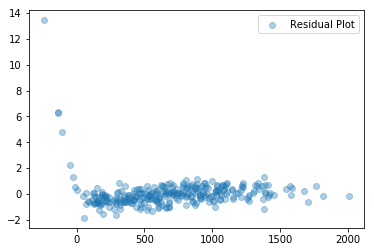

In [34]:
plot_model(X, y, model)

In [44]:
X = X[['Income', 'Limit', 'Age', 'Student']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
model = summary_model(X_train, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4460.
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          9.05e-196
Time:                        13:23:22   Log-Likelihood:                -1072.4
No. Observations:                 207   AIC:                             2155.
Df Residuals:                     202   BIC:                             2171.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -607.9468     13.962    -43.544      0.000    -635.476    -580.417
Income        -9.7745      0.142    -68.867      0.000     -10.054      -9.495
Limit          0.3206      0.003    116.541      0.000       0.315       0.326
Age           -0.9076      0.174     -5.228      0.000      -1.250      -0.565
Student      497.6897     10.136     49.102      0.000     477.704     517.675
==============================================================================
Omnibus:                       91.094   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.926
Skew:                           1.647   Prob(JB):                    1.82e-101
Kurtosis:                       9.552   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

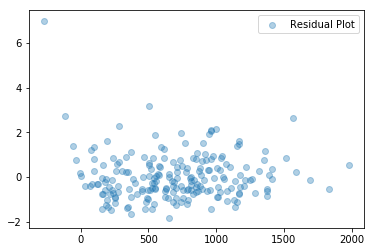

In [55]:
plot_model(X_train, y_train, model)